In [1]:
pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to c:\users\compu\appdata\local\temp\pip-install-krk_cu32\keras-ocr_0ac079666a27489f83b92c55125e60ea
  Resolved https://github.com/faustomorales/keras-ocr.git to commit b9c5a5871368fc337cbb6cd8f427b64a08626421
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/faustomorales/keras-ocr.git 'C:\Users\compu\AppData\Local\Temp\pip-install-krk_cu32\keras-ocr_0ac079666a27489f83b92c55125e60ea'


In [2]:
pip install "tensorflow<2.11"

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import typing
import string

import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
import hashlib

import urllib.request
import urllib.parse

tf.__version__

'2.10.1'

In [5]:
import keras_ocr

In [6]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\compu\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\compu\.keras-ocr\crnn_kurapan.h5


In [7]:
images = [
    keras_ocr.tools.read(img) for img in ['20230721_214550.jpg']
]

In [8]:
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 1s 1s/step


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

<Axes: >

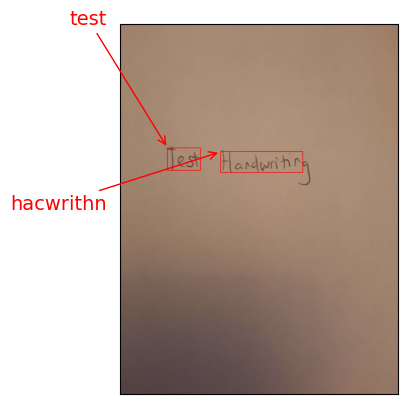

In [10]:
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0])

In [11]:
prediction_groups

[[('test',
   array([[ 511.71875, 1339.8438 ],
          [ 867.1875 , 1339.8438 ],
          [ 867.1875 , 1582.0312 ],
          [ 511.71875, 1582.0312 ]], dtype=float32)),
  ('hacwrithn',
   array([[1085.9375, 1378.9062],
          [1972.6562, 1378.9062],
          [1972.6562, 1605.4688],
          [1085.9375, 1605.4688]], dtype=float32))]]

In [12]:
from PIL import Image

In [13]:
im = Image.open(r"20230721_214550.jpg")
print(prediction_groups[0][0])
im_cropped = im.crop((prediction_groups[0][0][1][0][0], prediction_groups[0][0][1][0][1], prediction_groups[0][0][1][2][0], prediction_groups[0][0][1][2][1]))
im_cropped.show()

('test', array([[ 511.71875, 1339.8438 ],
       [ 867.1875 , 1339.8438 ],
       [ 867.1875 , 1582.0312 ],
       [ 511.71875, 1582.0312 ]], dtype=float32))


In [14]:
threshold = 127
fn = lambda x : 255 if x < threshold else 0
im_recolored = im_cropped.convert('L').point(fn, mode='1')
im_recolored.show()

In [15]:
values = np.array(im_recolored)
print(values.shape)
print(values)

(242, 355)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [16]:
normal_dataset = np.empty((39334, 28, 28))
i = 0

def convert_image(img):
    threshold = 127
    fn = lambda x : 255 if x > threshold else 0
    img_recolored = img.convert('L').point(fn, mode='1').resize((28, 28))
    return img_recolored

for file in os.listdir("data/Train/Normal"):
    img = Image.open(r"data/Train/Normal/" + file)
    normal_dataset[i] = np.array(convert_image(img))
    i += 1

normal_dataset

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
dyslexic_dataset = np.empty((65534, 28, 28))
i = 0

for file in os.listdir("data/Train/Corrected"):
    img = Image.open(r"data/Train/Corrected/" + file)
    dyslexic_dataset[i] = np.array(convert_image(img))
    i += 1

dyslexic_dataset

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
normal_dataset_reorganized = np.empty((39334, 28, 28))
dyslexic_dataset_reorganized = np.empty((65534, 28, 28))

for i in range(len(normal_dataset)):
    normal_dataset_reorganized[i] = np.transpose(normal_dataset[i])

for i in range(len(dyslexic_dataset)):
    dyslexic_dataset_reorganized[i] = np.transpose(dyslexic_dataset[i])



In [19]:
k = 1
normal_dataset_list = normal_dataset_reorganized.tolist()

for i in range(len(normal_dataset_list)):
    k = 1
    for j in reversed(normal_dataset_list[i]):
        if max(j) == 0:
            #print("Image " + str(i) + " Deleted column at index " + str(28 - k) + ". K = " + str(k))
            normal_dataset_list[i].pop(28 - k)
        k += 1


In [20]:
k = 1
dyslexic_dataset_list = dyslexic_dataset_reorganized.tolist()

for i in range(len(dyslexic_dataset_list)):
    k = 1
    for j in reversed(dyslexic_dataset_list[i]):
        if max(j) == 0:
            dyslexic_dataset_list[i].pop(28 - k)
        k += 1

In [38]:
import random
import matplotlib.cm as cm

random.seed(1)

normal_training = []

def add_spacing(img):
    for i in range(random.randint(0, 2)):
        img.append([0] * 28)

def create_training_normal(letters):
    nums = []
    spliced_image = []
    for i in range(letters * 5000):
        nums.append(random.randint(0, 35534))
    for i in range(5000):
        for k in range(letters):
            for j in normal_dataset_list[nums[i + 5000 * k]]:
                spliced_image.append(j)
            if k != letters - 1:
                add_spacing(spliced_image)
        normal_training.append(spliced_image)
        spliced_image = []

for i in range(3, 8):
    create_training_normal(i)

print(len(normal_training))

test = normal_training[24999]
test_image = np.transpose(np.array(test))
plt.imsave('8_letter.png', test_image, cmap=cm.gray)

25000


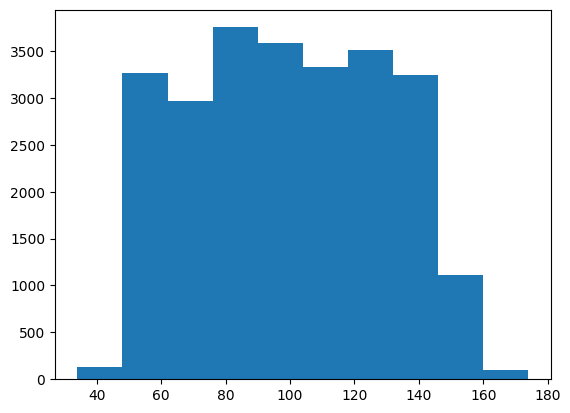

In [40]:
normal_training_columns = [len(x) for x in normal_training]
plt.hist(normal_training_columns)
plt.show()

In [ ]:
import collections

freq = collections.Counter(normal_training_columns)